In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/estat_tipsun20_en.csv")


In [3]:
youth_df = df[(df['age'] == 'Y15-24') & (df['sex'] == 'T') & (df['unit'] == 'PC_ACT')]

country_names = {
    "AT": "Austria",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CY": "Cyprus",
    "CZ": "Czechia",
    "DE": "Germany",
    "DK": "Denmark",
    "EE": "Estonia",
    "EL": "Greece",
    "ES": "Spain",
    "FI": "Finland",
    "FR": "France",
    "HR": "Croatia",
    "HU": "Hungary",
    "IE": "Ireland",
    "IT": "Italy",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "MT": "Malta",
    "NL": "Netherlands",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SE": "Sweden",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "EU27_2020": "European Union (27 countries since 2020)"
}


available_codes = sorted(youth_df['geo'].unique())
available_codes


#print("Available country codes in this dataset:")
#for code in available_codes:
    #print(f"  {code} → {full_country_map.get(code, 'Unknown / Aggregate')}")



['AT',
 'BE',
 'BG',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EA20',
 'EE',
 'EL',
 'ES',
 'EU27_2020',
 'FI',
 'FR',
 'HR',
 'HU',
 'IE',
 'IT',
 'LT',
 'LU',
 'LV',
 'MT',
 'NL',
 'PL',
 'PT',
 'RO',
 'SE',
 'SI',
 'SK']

In [4]:
user_input = input("Enter 3 country codes (e.g., DE, PL, RO): ")
selected_countries = [code.strip().upper() for code in user_input.split(",")]

In [5]:
filtered_df = youth_df[youth_df['geo'].isin(selected_countries)]

    
filtered_df.loc[:,"Country"] = filtered_df["geo"].map(country_names)

 
pivot_df = filtered_df.pivot(index='TIME_PERIOD', columns='Country', values='OBS_VALUE')

/var/folders/rp/zd69tj5j5251k85f92ks6k800000gn/T/ipykernel_18516/2322270846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,"Country"] = filtered_df["geo"].map(country_names)


<Figure size 1000x600 with 0 Axes>

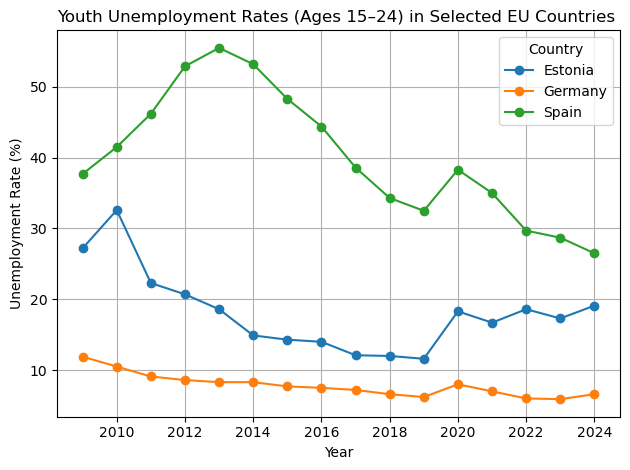

In [6]:
plt.figure(figsize=(10, 6))
pivot_df.plot(marker='o')
plt.title("Youth Unemployment Rates (Ages 15–24) in Selected EU Countries ")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

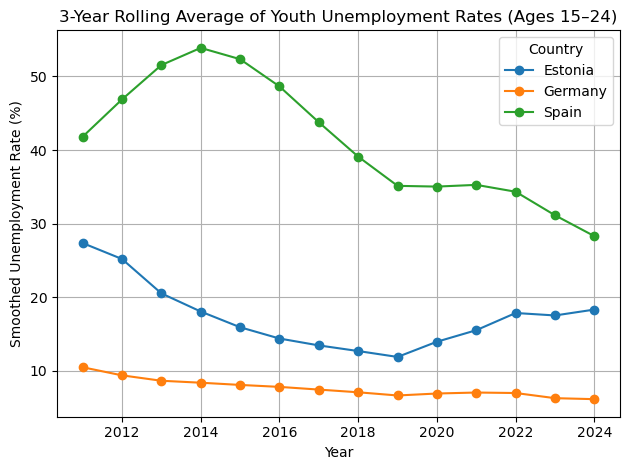

In [7]:
rolling_df = pivot_df.rolling(window=3).mean()
plt.figure(figsize=(10, 6))
rolling_df.plot(marker='o')
plt.title("3-Year Rolling Average of Youth Unemployment Rates (Ages 15–24)")
plt.xlabel("Year")
plt.ylabel("Smoothed Unemployment Rate (%)")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

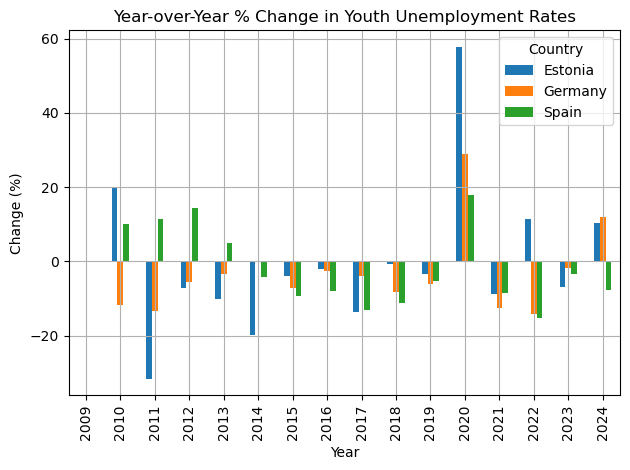

In [8]:
pct_change_df = pivot_df.pct_change() * 100
plt.figure(figsize=(10, 6))
pct_change_df.plot(kind='bar')
plt.title("Year-over-Year % Change in Youth Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Change (%)")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()
